## Part 3: Consuming data using Kafka
In this task, we will implement an Apache Kafka consumer to consume the data from part 2.  

- In this part, use Kafka consumer to consume the streaming data published from task 2.8.
- This part doesn’t require parallel processing, you don’t need to use Spark.
- Please use pandas or Python functions to do the simple calculations for visualisation.

In [ ]:
# import statements
from time import sleep
from kafka3 import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads
import matplotlib.dates as mdates

# Configuration
hostip = "kafka"

1. Plot a bar chart showing the number of applications and the number of predicted default applications side-by-side(see the illustration from the specification as an example). For every batch, your diagram will be updated with two additional bars. The x-axis is datetime, y-axis is the number of applications.


<IPython.core.display.Javascript object>


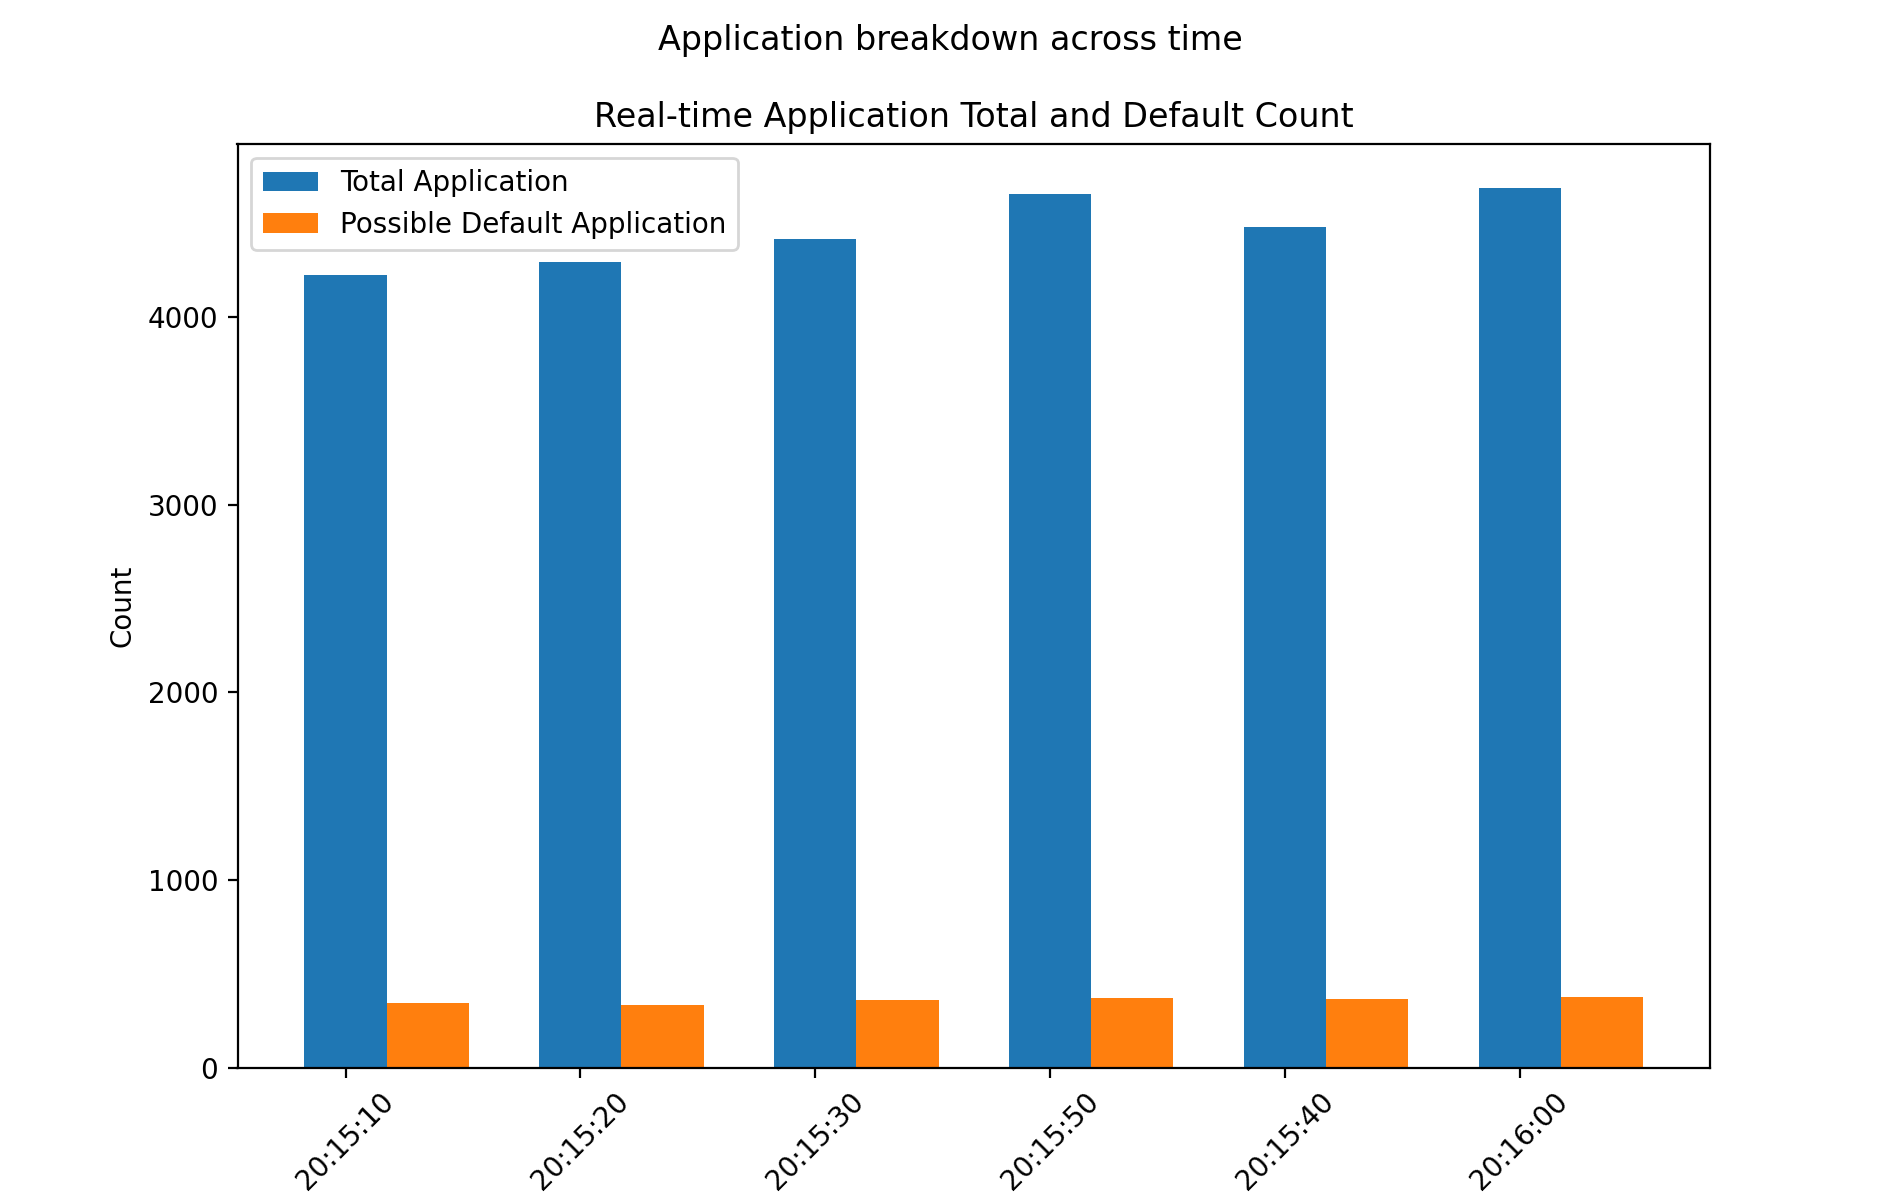

KeyboardInterrupt: 

In [ ]:
%matplotlib notebook

topic_1 = "application_visulisation_1"

def connect_kafka_consumer_1():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic_1,
                                   consumer_timeout_ms=30000,
                                   auto_offset_reset='latest',
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   value_deserializer=lambda x: loads(x.decode('utf-8')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots_1():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height))
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Number of Application')
        fig.suptitle('Application breakdown across time')
        fig.show()
        fig.canvas.draw()
        return fig, ax1
    except Exception as ex:
        print(str(ex))

def consume_messages_1(consumer, fig, ax):
    try:
        y_1 = [] # total applications
        y_2 = [] # potential default aplications
        x = [] # timestamp

        for message in consumer:
            data = message.value

            total_applications = data['total_number_of_applications']
            potential_defaults = data['number_of_potential_default_applications']
            window_start_str = data['window']['start']
            window_start = dt.datetime.fromisoformat(window_start_str[:-6])

            x.append(window_start)
            y_1.append(total_applications)
            y_2.append(potential_defaults)

            if len(x) > 6:
                x.pop(0)
                y_1.pop(0)
                y_2.pop(0)

            ax.clear()

            x_axis = range(len(x))
            width = 0.35

            # Plotting
            ax.bar(x_axis, y_1, width, label='Total Application')
            ax.bar([position + width for position in x_axis], y_2, width, label='Possible Default Application')

            ax.legend()
            ax.set_xlabel('Time')
            ax.set_ylabel('Count')
            ax.set_title('Real-time Application Total and Default Count')
            ax.set_xticks(x_axis)
            ax.set_xticklabels([item.strftime('%H:%M:%S') for item in x], rotation=45)

            fig.canvas.draw()

        plt.close('all')

    except Exception as ex:
        print(str(ex))

if __name__ == '__main__':
    consumer = connect_kafka_consumer_1()
    fig, ax = init_plots_1()
    consume_messages_1(consumer, fig, ax)

## Reference: (2024, January 29). FIT5202 - Week09 - LT1-Consumer [Lab Resources].

2. With streaming data from 7b’s Kafka topic, plot a cumulative line chart and bar chart of required credits, and annotate every 15 seconds with a numerical valued label. Please see the figure from the specification as an example.


<IPython.core.display.Javascript object>


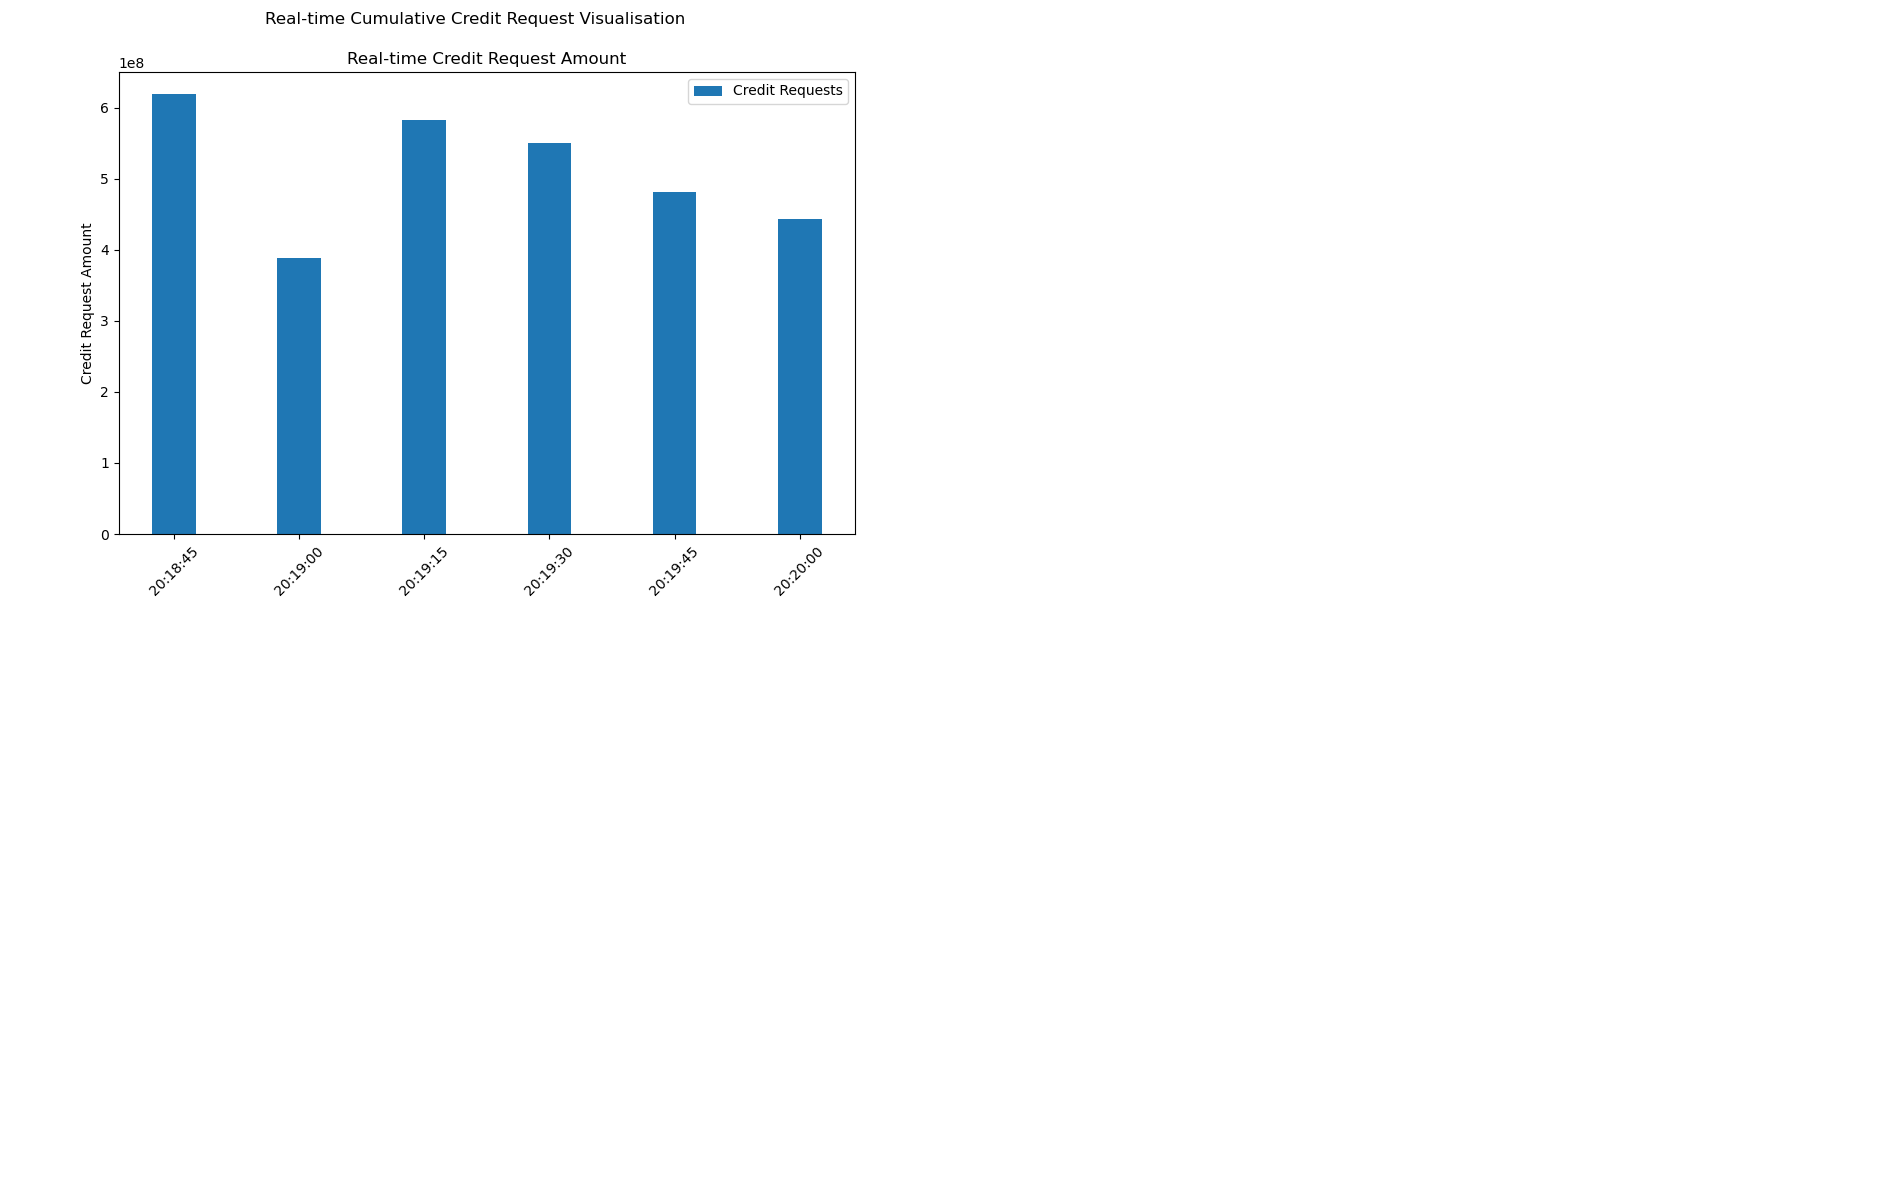

In [ ]:
%matplotlib notebook

topic_2 = "application_visulisation_2"

def connect_kafka_consumer_2():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic_2,
                                   consumer_timeout_ms=30000,
                                   auto_offset_reset='latest',
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   value_deserializer=lambda x: loads(x.decode('utf-8')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer


def init_plots_2():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width, height))
        ax = fig.add_subplot(111)
        fig.suptitle('Real-time Cumulative Credit Request Visualisation')
        ax.set_xlabel('Time')
        ax.set_ylabel('Cumulative Credit')
        fig.show()
        fig.canvas.draw()
        return fig, ax
    except Exception as ex:
        print(str(ex))

def consume_messages_2(consumer, fig, ax):
    try:
        y = [] # credit request
        x_axis = []
        label = [] # timestamp label

        for message in consumer:
            data = message.value

            total_credit_request = data['total_credit_request']
            window_start_str = data['window']['start']
            window_start = dt.datetime.fromisoformat(window_start_str[:-6])

            x_axis.append(len(x_axis))
            y.append(total_credit_request)
            label.append(window_start.strftime('%H:%M:%S'))


            if len(x_axis) > 10:
                x_axis.pop(0)
                y.pop(0)
                label.pop(0)

            ax.clear()
            width = 0.35

            ax.bar(x_axis, y, width, label='Credit Requests')

            ax.set_xticks(x_axis)
            ax.set_xticklabels(label, rotation=45)

            ax.legend()
            ax.set_xlabel('Time')
            ax.set_ylabel('Credit Request Amount')
            ax.set_title('Real-time Credit Request Amount')
            fig.canvas.draw()

        plt.close('all')

    except Exception as ex:
        print(str(ex))


if __name__ == '__main__':
    consumer = connect_kafka_consumer_2()
    fig, ax = init_plots_2()
    consume_messages_2(consumer, fig, ax)

Due to limited time, I was unable to complete the plotting for cumulative credit request visulisation. However, I did streamed the required dataframe as is shown in assignment 2b task 2, and plotted the bar chart for credit request amount against time.